In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

from unicodedata import category
from tqdm import tqdm
#from tqdm import tqdm_notebook as tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
print(len(data))

738469


__There are more than 730,000 Applied Physics articles__

In [6]:
# Dropping all the NaNs - Just making sure that our data is clean

data = data.dropna()
print(data['Label'].unique())

['Physics, Applied']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc5892a860>]],
      dtype=object)

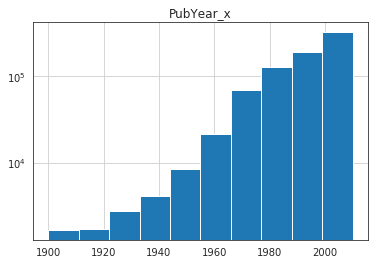

In [7]:
# How does the count of articles vary with year
data.hist(column='PubYear_x', log=True)

__Applied Physics articles are increasing steadily__

In [8]:
# How are the average citations of physics articles varying - let us add 1 to add citation for normalization
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))

Progress: 100%|██████████| 738469/738469 [00:01<00:00, 480205.88it/s]


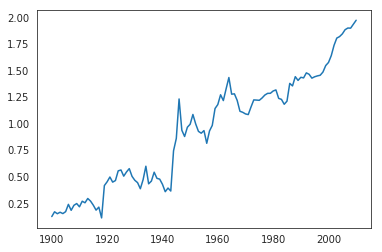

In [9]:
# How is log_c5 varying with years
average_citations_groupedby_year = data.groupby('PubYear_x', as_index=False)['log_c5'].mean()
plt.plot(average_citations_groupedby_year['PubYear_x'], average_citations_groupedby_year['log_c5'])
plt.show() 

__The average number of citations per year is increasing__

Progress: 100%|██████████| 738469/738469 [00:00<00:00, 782529.85it/s]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


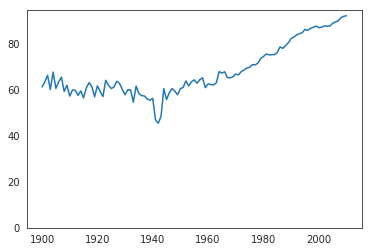

In [20]:
# How is the yearly variation of average character count in titles? - no clean up, everything including punctuations
# are considered

def get_length(s):
    len_s = 0
    try:
        len_s = len(s)
    except:
        pass
    return len_s

data['character_count'] = data['Title'].progress_apply(lambda x: get_length(x))

average_character_count_groupedby_year = data.groupby('PubYear_x', as_index=False)['character_count'].mean()
plt.plot(average_character_count_groupedby_year['PubYear_x'], 
         average_character_count_groupedby_year['character_count'])
plt.ylim(ymin=0)
plt.show() 

__Papers in the 1940s have relatively a little short titles in comparison?__

,PubYear_x,character_count
36,1936,57.536741
37,1937,57.424107
38,1938,56.100000
39,1939,55.544271
40,1940,56.391813
41,1941,47.071269
42,1942,45.523114
43,1943,48.493188
44,1944,60.610619
45,1945,55.847826


In [15]:
data_40 = data[(data['PubYear_x'] >= 1939) & (data['PubYear_x'] <= 1941)]

# What is the average character length of papers during this era
char_mean = data_40['character_count'].mean()
print(char_mean)

52.5531914893617
